# 1) Dictionary based approach

In [7]:
# Loading spark libraries...

import findspark
findspark.init('/home/vishal/spark-2.4.0-bin-hadoop2.7')
from pyspark.sql import SparkSession
spark1=SparkSession.builder.appName('Ops').getOrCreate()

In [54]:
# loading all positive review file names  and negative file names in a list....

import pathlib
text_files_pos=[]
text_files_neg=[]

import os
path ='/home/vishal/aclImdb_v1/aclImdb/train/pos'
text_files_pos = [f for f in os.listdir(path) if f.endswith('.txt')]

path_neg ='/home/vishal/aclImdb_v1/aclImdb/train/neg'
text_files_neg= [f for f in os.listdir(path_neg) if f.endswith('.txt')]



In [40]:
# prepending the directory path to all files...

pre='/home/vishal/aclImdb_v1/aclImdb/train/pos/'
text_files_pos_new=[]
for item in text_files_pos:
    pre1=pre
    pre1=pre1+item
    text_files_pos_new.append(pre1)

In [55]:
pre2='/home/vishal/aclImdb_v1/aclImdb/train/neg/'

text_files_neg_new=[]
for item in text_files_neg:
    pre1=pre2
    pre1=pre1+item
    text_files_neg_new.append(pre1)

In [41]:
print(text_files_pos_new[0])

/home/vishal/aclImdb_v1/aclImdb/train/pos/12441_9.txt


In [56]:
print(text_files_neg_new[0])

/home/vishal/aclImdb_v1/aclImdb/train/neg/2469_2.txt


In [44]:
len(text_files_pos_new)

12500

In [57]:
len(text_files_neg_new)

12500

In [48]:
print(text_files_pos_new[0:10])

['/home/vishal/aclImdb_v1/aclImdb/train/pos/12441_9.txt', '/home/vishal/aclImdb_v1/aclImdb/train/pos/8731_7.txt', '/home/vishal/aclImdb_v1/aclImdb/train/pos/12306_9.txt', '/home/vishal/aclImdb_v1/aclImdb/train/pos/5804_10.txt', '/home/vishal/aclImdb_v1/aclImdb/train/pos/5584_8.txt', '/home/vishal/aclImdb_v1/aclImdb/train/pos/7580_7.txt', '/home/vishal/aclImdb_v1/aclImdb/train/pos/1463_10.txt', '/home/vishal/aclImdb_v1/aclImdb/train/pos/2987_10.txt', '/home/vishal/aclImdb_v1/aclImdb/train/pos/10160_7.txt', '/home/vishal/aclImdb_v1/aclImdb/train/pos/211_9.txt']


In [58]:
print(text_files_neg_new[0])

/home/vishal/aclImdb_v1/aclImdb/train/neg/2469_2.txt


In [36]:
# function to read contents of a file...

def readfile(filename):
    mytext=[]
    with open(filename) as f:
        
        data=f.read()
        mytext.append(data)
     
    return mytext

In [52]:
# Reading contents of all positive review files...

# This list will store all positive reviews present in 12500 pos rev files...
pos_rev=[]

for file in text_files_pos_new:
    content_of_file=readfile(file)
    pos_rev.append(content_of_file)
    



In [43]:
print(pos_rev[0])

['This was the Modesty that we didn\'t know! It was hinted at and summarized in the comic strip for the syndicates to sell to newspapers! Lee and Janet Batchler were true Modesty Blaise fans who were given The Dream Job - tell a prequel story of Modesty that the fans never saw before. In their audio-commentary, they admitted that that they made changes in her origin to make the story run smoother. The "purists" should also note that we really don\'t know if everything she told Miklos was true because she was "stalling for time." I didn\'t rent or borrow the DVD like other "reviewers" did, I bought it! And I don\'t want a refund! I watched it three times and I didn\'t sleep through it! Great dialog and well-drawn characters that I cared about (even bad guy Miklos) just like in the novels and comic strips! I too can\'t wait for the next Modesty (and Willie) film,especially if this "prequel" is a sign of what\'s to come!']


In [70]:
type(pos_rev[0])

list

In [59]:
# Reading contents of all negative review files...

# This list will store all neg reviews present in 12500 neg rev files...
neg_rev=[]
for file in text_files_neg_new:
    content_of_file=readfile(file)
    neg_rev.append(content_of_file)

In [60]:
print(neg_rev[0])

["I suppose if you like endless dialogue that doesn't forward the story and flashy camera effects like the scene transitions in the television show _Angel_, you'll enjoy the film. Me? All I wanted was a nice, tight little story, and it wasn't there. The pacing was practically backward, plot points were buried under a sea of unneeded dialogue, and there was absolutely no sense of dread, or tension, or ANYTHING.<br /><br />Is it the redneck? Is it the Wendigo? No, it's a cameraman on speed. That's not scary. It doesn't generate a single note of tension or atmosphere unless you're scared by MTV. Like those reviewers before me, I too noticed that by the end the movie invokes derisive laughter from the audience.<br /><br />Terrible film."]


## Data cleaning

In [64]:
import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [67]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [68]:
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer


In [76]:
# cleaning all pos reviews ......

pos_rev_cleaned=[]
for sent in pos_rev:
    filtered_sent=[]
    s=str(sent)
    sent=cleanhtml(s)
    
    for w in sent.split():
            
            for cleaned_words in cleanpunc(w).split():
                
                if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                    if(cleaned_words.lower() not in stop):
                        s=(sno.stem(cleaned_words.lower())).encode('utf8')
                        filtered_sent.append(s)
                    
                    else:
                        continue
                
                else:
                    continue
    
    str1 = b" ".join(filtered_sent) 
    pos_rev_cleaned.append(str1)               
                    
    
    
    
        

In [77]:
pos_rev_cleaned[0]

b'modesti know hint summar comic strip syndic sell newspap lee janet batchler true modesti blais fan given dream job tell prequel stori modesti fan never saw admit made chang origin make stori run smoother purist also note realli know everyth told miklo true stall time rent borrow dvd like review bought want refund watch three time sleep great dialog charact care even bad guy miklo like novel comic strip wait next modesti willi film especi prequel sign'

In [88]:
len(pos_rev_cleaned)

12500

In [78]:
from tqdm import tqdm

In [79]:
# cleaning all negative reviews...

neg_rev_cleaned=[]
for sent in tqdm(neg_rev):
    filtered_sent=[]
    s=str(sent)
    sent=cleanhtml(s)
    
    for w in sent.split():
            
            for cleaned_words in cleanpunc(w).split():
                
                if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                    if(cleaned_words.lower() not in stop):
                        s=(sno.stem(cleaned_words.lower())).encode('utf8')
                        filtered_sent.append(s)
                    
                    else:
                        continue
                
                else:
                    continue
    
    str1 = b" ".join(filtered_sent) 
    neg_rev_cleaned.append(str1)               
                    
    
    
    
        

100%|██████████| 12500/12500 [00:36<00:00, 343.57it/s]


In [80]:
import pandas as pd

In [94]:
# Loading positive reviews in the dataframe...
df=pd.DataFrame(pos_rev_cleaned,columns=['reviews'])

In [95]:
df.head()

,reviews
0,b'modesti know hint summar comic strip syndic ...
1,b'watch life first time long help see comparis...
2,b'chines ghost stori star late great lesli che...
3,b'jackson popular usa anymor howev europ espec...
4,b'cannot comment film without discuss signific...


In [96]:
# adding the score column to the dataframe
df['score']=1

In [97]:
df.head()

,reviews,score
0,b'modesti know hint summar comic strip syndic ...,1
1,b'watch life first time long help see comparis...,1
2,b'chines ghost stori star late great lesli che...,1
3,b'jackson popular usa anymor howev europ espec...,1
4,b'cannot comment film without discuss signific...,1


In [98]:
len(df)

12500

In [99]:
# creating a dataframe for neg reviews
df2=pd.DataFrame(neg_rev_cleaned,columns=['reviews'])

In [101]:
df2.head()

,reviews
0,b'suppos like endless dialogu doesnt forward s...
1,b'watch hope find someth know modern infam man...
2,b'movi origin leav messag touch certain way so...
3,b'mani movi featur bigfoot major good least go...
4,b'chapter ongo question whatev happen mel sens...


In [132]:
df2['score']=-1

In [133]:
df2.head()

,reviews,score
0,b'suppos like endless dialogu doesnt forward s...,-1
1,b'watch hope find someth know modern infam man...,-1
2,b'movi origin leav messag touch certain way so...,-1
3,b'mani movi featur bigfoot major good least go...,-1
4,b'chapter ongo question whatev happen mel sens...,-1


In [134]:
# creating the final dataframe by merging both pos and neg reviews dataframes....
df_final = pd.concat([df, df2], ignore_index=True)


In [135]:
df_final.head()

,reviews,score
0,b'modesti know hint summar comic strip syndic ...,1
1,b'watch life first time long help see comparis...,1
2,b'chines ghost stori star late great lesli che...,1
3,b'jackson popular usa anymor howev europ espec...,1
4,b'cannot comment film without discuss signific...,1


In [136]:
df_final.tail()

,reviews,score
24995,b'movi appear job train exercis coppola famili...,-1
24996,b'one much better enjoy lot one even produc sm...,-1
24997,b'love first littl mermaid know song love char...,-1
24998,b'bad one one movi doesnt even one posit effec...,-1
24999,b'realli stand incred crappi kill absolut act ...,-1


### Loading the dictionary of all positive words and negative words....

In [107]:
# this dictionary contains the pos and neg words having sentiment score of +1 and -1 respectively...

!wget https://github.com/daniel-acuna/python_data_science_intro/blob/master/data/sentiments.parquet.zip?raw=true -O sentiments.parquet.zip && unzip sentiments.parquet.zip && rm sentiments.parquet.zip


--2018-11-29 19:41:24--  https://github.com/daniel-acuna/python_data_science_intro/blob/master/data/sentiments.parquet.zip?raw=true
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-acuna/python_data_science_intro/raw/master/data/sentiments.parquet.zip [following]
--2018-11-29 19:41:25--  https://github.com/daniel-acuna/python_data_science_intro/raw/master/data/sentiments.parquet.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-acuna/python_data_science_intro/master/data/sentiments.parquet.zip [following]
--2018-11-29 19:41:25--  https://raw.githubusercontent.com/daniel-acuna/python_data_science_intro/master/data/sentiments.parquet.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.19

In [110]:
# loading the dictionary into a dataframe.....
sentiments_df=pd.read_parquet('sentiments.parquet')

In [111]:
sentiments_df.head()

,word,sentiment
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1


In [126]:
len(sentiments_df)

6789

In [128]:
sentiments_df.loc[6000]

word         squash
sentiment        -1
Name: 6000, dtype: object

In [118]:
sentiment_pos_df=sentiments_df[sentiments_df['sentiment']==1]

In [119]:
#List of pos words....
sent_pos_words=list(sentiment_pos_df['word'].values)

In [120]:
sent_pos_words[0]

'a+'

In [131]:
sentiment_neg_df=sentiments_df[sentiments_df['sentiment']==-1]
# List of all neg words
sent_neg_words=list(sentiment_neg_df['word'].values)
print(sent_neg_words[5])

abominably


In [121]:
mystr=sent_pos_words[0]

if mystr in sent_pos_words:
    print(mystr)

a+


In [139]:
# Checking each word of a review in list of pos words and neg words and increasing the counts respectively....

final_score=[]
for rev in tqdm(df_final['reviews'].values):
    sent=str(rev)
    pos_cnt=0
    neg_cnt=0
    for word in sent.split():
        if word in sent_pos_words:
            pos_cnt+=1
        
        elif word in sent_neg_words:
            neg_cnt+=1
            
        else:
            continue
    
    if pos_cnt-neg_cnt>0:
        final_score.append(1)
    
    elif pos_cnt-neg_cnt<0:
        final_score.append(-1)
    
    else:
        final_score.append(0)
            

100%|██████████| 25000/25000 [05:02<00:00, 82.67it/s] 


In [140]:
len(final_score)

25000

## Confusion matrix

In [144]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(df_final['score'].values, final_score) 
print()
print('Confusion Matrix :')
print()
print(results) 
print()
print('Accuracy Score :',accuracy_score(df_final['score'].values, final_score)) 
print()
print('Report : ') 
print()
print(classification_report(df_final['score'].values, final_score)) 


Confusion Matrix :

[[7241 1202 4057]
 [   0    0    0]
 [2756  923 8821]]

Accuracy Score : 0.64248

Report : 

             precision    recall  f1-score   support

         -1       0.72      0.58      0.64     12500
          0       0.00      0.00      0.00         0
          1       0.68      0.71      0.70     12500

avg / total       0.70      0.64      0.67     25000



# Conlusion :

### clearly the accuracy achieved in dictionary based approach is 64.24 %..
### Let's see if we can increase it further by using machine learning approach...

.

.

# 2) Machine learning approach

In [175]:
#Importing necessary libraries for building model..

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

In [176]:
df_final.shape

(25000, 2)

In [180]:
# Text to vector conversion..for Training dataset
# Creating bag of words on the Training set...
#BoW
count_vect = CountVectorizer() #in scikit-learn
bow = count_vect.fit_transform(df_final["reviews"].values)

In [181]:
bow.shape

(25000, 47706)

In [182]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler(with_mean=False).fit_transform(bow)
print(standardized_data.shape)


(25000, 47706)


In [183]:
# split the data set into train and test
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(standardized_data, df_final["score"].values, test_size=0.3, random_state=0)

In [256]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

# K-nn(Bag of words)

In [190]:
# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in tqdm(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k_bow = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k_bow)



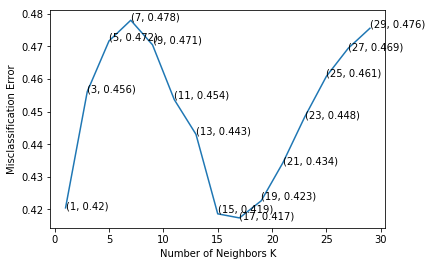

the misclassification error for each k value is :  [0.42  0.456 0.472 0.478 0.471 0.454 0.443 0.419 0.417 0.423 0.434 0.448
 0.461 0.469 0.476]


In [189]:
# plot misclassification error vs k 
import matplotlib.pyplot as plt
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [191]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal_bow = KNeighborsClassifier(n_neighbors=optimal_k_bow)

# fitting the model
knn_optimal_bow.fit(X_train, Y_train)

# predict the response
knn_pred_bow = knn_optimal_bow.predict(X_test)

# evaluate accuracy
knn_acc_bow = accuracy_score(Y_test, knn_pred_bow) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k_bow, knn_acc_bow))


The accuracy of the knn classifier for k = 17 is 57.960000%


In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (7,5), fontsize=14):
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("CONFUSION MATRIX")
    
    return fig

In [214]:
plt.close()

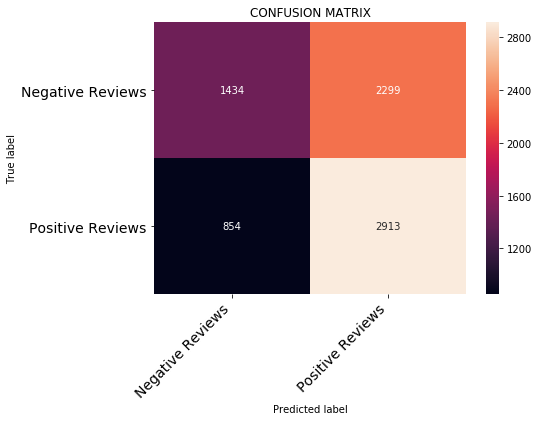

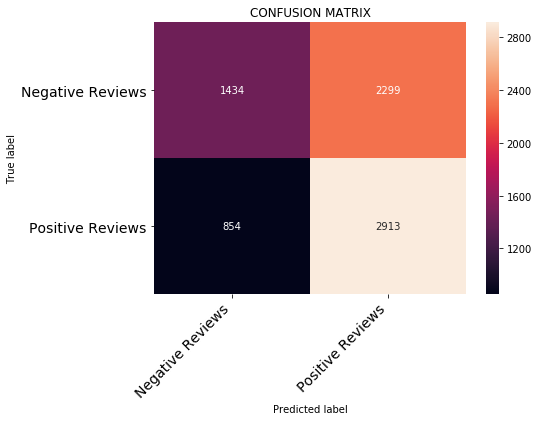

In [215]:
#Confusion matrix.....
#Classification Report......
from sklearn.metrics import classification_report
results = confusion_matrix(Y_test, knn_pred_bow)
print_confusion_matrix(results,["Negative Reviews","Positive Reviews"])


In [216]:
print('ACCURACY SCORE :',accuracy_score(Y_test, knn_pred_bow)) 
print()
print('REPORT : ') 
print(classification_report(Y_test, knn_pred_bow)) 

ACCURACY SCORE : 0.5796

REPORT : 
             precision    recall  f1-score   support

         -1       0.63      0.38      0.48      3733
          1       0.56      0.77      0.65      3767

avg / total       0.59      0.58      0.56      7500



# KNN(TF-IDF)

In [193]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(df_final['reviews'].values)

In [194]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data_tf = StandardScaler(with_mean=False).fit_transform(final_tf_idf)
print(standardized_data_tf.shape)


(25000, 47706)


In [196]:
X_train_tf, X_test_tf, Y_train_tf, Y_test_tf = cross_validation.train_test_split(standardized_data_tf, df_final["score"].values, test_size=0.3, random_state=0)

100%|██████████| 10/10 [03:55<00:00, 25.08s/it]


The optimal number of neighbors is 9.


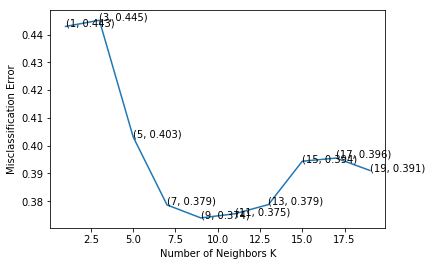

the misclassification error for each k value is :  [0.443 0.445 0.403 0.379 0.374 0.375 0.379 0.394 0.396 0.391]


In [197]:
# creating odd list of K for KNN
myList = list(range(0,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in tqdm(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train_tf, Y_train_tf, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k_tf = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k_tf)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [198]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal_tf = KNeighborsClassifier(n_neighbors=optimal_k_tf)

# fitting the model
knn_optimal_tf.fit(X_train_tf, Y_train_tf)

# predict the response
knn_pred_tf = knn_optimal_tf.predict(X_test_tf)

# evaluate accuracy
knn_acc_tf = accuracy_score(Y_test_tf, knn_pred_tf) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k_tf, knn_acc_tf))


The accuracy of the knn classifier for k = 9 is 64.066667%


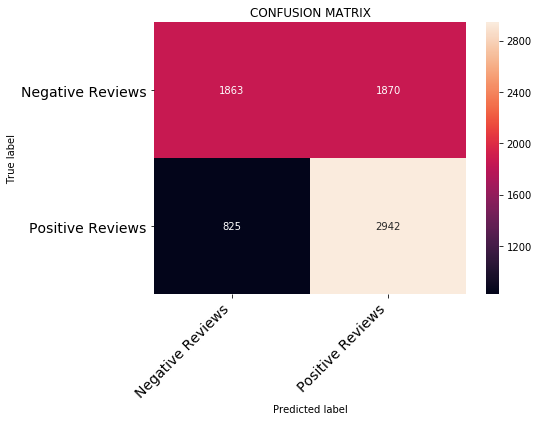

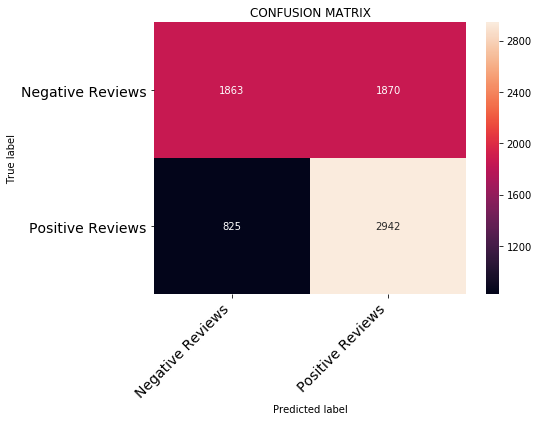

In [217]:
#Confusion matrix.....
#Classification Report......
from sklearn.metrics import classification_report
results = confusion_matrix(Y_test_tf, knn_pred_tf)
print_confusion_matrix(results,["Negative Reviews","Positive Reviews"])


In [199]:
#Confusion matrix.....
#Classification Report......
results = confusion_matrix(Y_test_tf, knn_pred_tf)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test_tf, knn_pred_tf)) 
print()
print('REPORT : ') 
print(classification_report(Y_test_tf, knn_pred_tf)) 

CONFUSION MATRIX :

[[1863 1870]
 [ 825 2942]]

ACCURACY SCORE : 0.6406666666666667

REPORT : 
             precision    recall  f1-score   support

         -1       0.69      0.50      0.58      3733
          1       0.61      0.78      0.69      3767

avg / total       0.65      0.64      0.63      7500



# 2) Naive Bayes(BOW)

100%|██████████| 7/7 [00:02<00:00,  2.36it/s]


The optimal value of alpha is 1


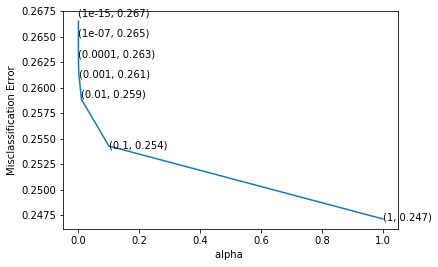

the misclassification error for each alpha value is :  [0.267 0.265 0.263 0.261 0.259 0.254 0.247]


In [200]:
from sklearn.naive_bayes import MultinomialNB
#creating a list of alpha values
mylist=[10**-15,10**-7,10**-4,10**-3,10**-2,10**-1,10**0]

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for a in tqdm(mylist):
    mnb = MultinomialNB(alpha=a)
    scores = cross_val_score(mnb,X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best alpha
nb_optimal_a_bow = mylist[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is {}'.format(nb_optimal_a_bow))

# plot misclassification error vs alpha 
plt.plot(mylist, MSE)

for xy in zip(mylist, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('alpha ')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,3))

In [202]:
# instantiate learning model alpha = optimal_a_bow
mnb_optimal_bow =MultinomialNB(alpha=nb_optimal_a_bow)

# fitting the model
mnb_optimal_bow.fit(X_train, Y_train)

# predict the response
mnb_pred_bow_test = mnb_optimal_bow.predict(X_test)

# evaluate accuracy
mnb_acc_bow_test = accuracy_score(Y_test, mnb_pred_bow_test) * 100
print('\nThe accuracy on test set of the MultinomialNB classifier for alpha = {}'.format((mnb_optimal_bow, mnb_acc_bow_test)))


The accuracy on test set of the MultinomialNB classifier for alpha = (MultinomialNB(alpha=1, class_prior=None, fit_prior=True), 76.13333333333333)


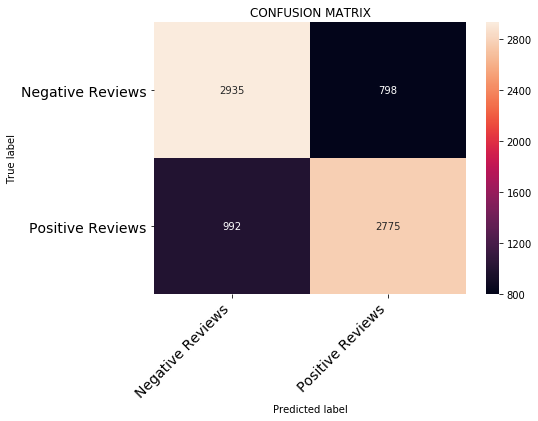

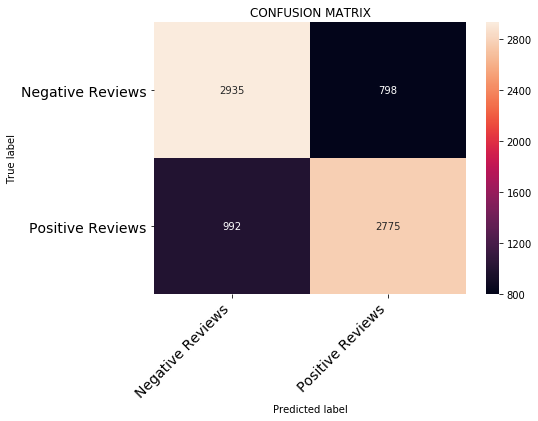

In [218]:
results = confusion_matrix(Y_test, mnb_pred_bow_test)
print_confusion_matrix(results,["Negative Reviews","Positive Reviews"])

In [219]:
#Confusion matrix.....
#Classification Report......

print()
print('ACCURACY SCORE :',accuracy_score(Y_test, mnb_pred_bow_test)) 
print()
print('REPORT : ') 
print(classification_report(Y_test, mnb_pred_bow_test)) 


ACCURACY SCORE : 0.7613333333333333

REPORT : 
             precision    recall  f1-score   support

         -1       0.75      0.79      0.77      3733
          1       0.78      0.74      0.76      3767

avg / total       0.76      0.76      0.76      7500



## 2) BINARY-BAG OF WORDS

In [220]:
# Text to vector conversion..for Training dataset
# Creating bag of words on the Training set...
#Binary BoW
count_vect_b = CountVectorizer(binary=True) #in scikit-learn
binary_bow = count_vect_b.fit_transform(df_final["reviews"].values)

In [221]:
binary_bow.shape

(25000, 47706)

In [223]:
# Data-preprocessing: Standardizing the data
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
standardized_data_binary_bow = StandardScaler(with_mean=False).fit_transform(binary_bow)
print(standardized_data_binary_bow.shape)

(25000, 47706)


In [224]:
X_train_bbow, X_test_bbow, Y_train_bbow, Y_test_bbow = cross_validation.train_test_split(standardized_data_binary_bow, df_final["score"].values, test_size=0.3, random_state=0)

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


The optimal value of alpha is 0.1


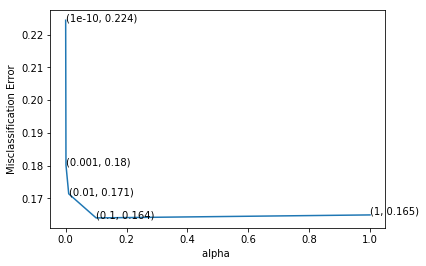

the misclassification error for each alpha value is :  [0.224 0.18  0.171 0.164 0.165]


In [225]:
plt.close()
from sklearn.naive_bayes import BernoulliNB
#creating a list of alpha values
mylist=[10**-10,10**-3,10**-2,10**-1,10**0]

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for a in tqdm(mylist):
    bnb = BernoulliNB(alpha=a)
    scores = cross_val_score(bnb,X_train_bbow, Y_train_bbow, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best alpha
nb_optimal_a_binary_bow = mylist[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is {}'.format(nb_optimal_a_binary_bow))

# plot misclassification error vs alpha 
plt.plot(mylist, MSE)

for xy in zip(mylist, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('alpha ')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,3))

In [226]:
# instantiate learning model alpha = optimal_a_bow
bnb_optimal_bow =BernoulliNB(alpha=nb_optimal_a_binary_bow)

# fitting the model
bnb_optimal_bow.fit(X_train_bbow, Y_train_bbow)

# predict the response
nb_pred_binary_bow_test = bnb_optimal_bow.predict(X_test_bbow)

# evaluate accuracy
nb_acc_binary_bow_test = accuracy_score(Y_test_bbow,nb_pred_binary_bow_test) * 100
print('\nThe accuracy on test set of the BernoulliNB classifier for alpha = {}'.format((nb_optimal_a_binary_bow, nb_acc_binary_bow_test)))


The accuracy on test set of the BernoulliNB classifier for alpha = (0.1, 83.81333333333333)


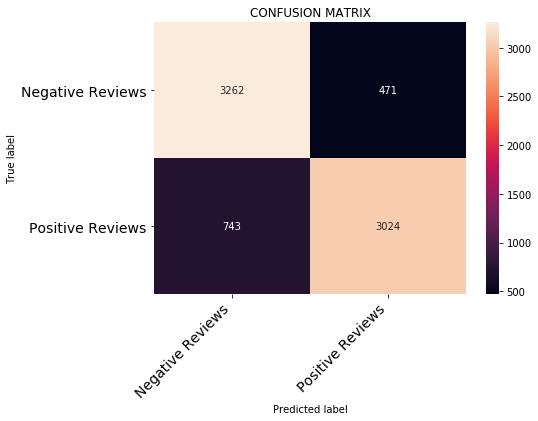

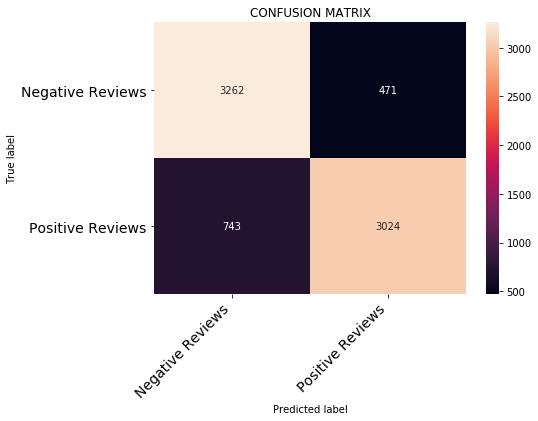

In [227]:
results = confusion_matrix(Y_test_bbow, nb_pred_binary_bow_test)
print_confusion_matrix(results,["Negative Reviews","Positive Reviews"])

In [228]:
#Confusion matrix.....
#Classification Report......

print()
print('ACCURACY SCORE :',accuracy_score(Y_test_bbow, nb_pred_binary_bow_test)) 
print()
print('REPORT : ') 
print(classification_report(Y_test_bbow, nb_pred_binary_bow_test)) 


ACCURACY SCORE : 0.8381333333333333

REPORT : 
             precision    recall  f1-score   support

         -1       0.81      0.87      0.84      3733
          1       0.87      0.80      0.83      3767

avg / total       0.84      0.84      0.84      7500



# 3) TF-IDF

100%|██████████| 4/4 [00:01<00:00,  2.43it/s]


The optimal value of alpha is 1


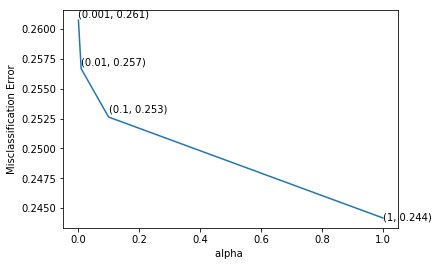

the misclassification error for each alpha value is :  [0.261 0.257 0.253 0.244]


In [232]:
from sklearn.naive_bayes import MultinomialNB
#creating a list of alpha values
mylist=[10**-3,10**-2,10**-1,10**0]

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for a in tqdm(mylist):
    mnb = MultinomialNB(alpha=a)
    scores = cross_val_score(mnb,X_train_tf, Y_train_tf, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best alpha
mnb_optimal_a_tf = mylist[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is {}'.format(mnb_optimal_a_tf))

# plot misclassification error vs alpha 
plt.plot(mylist, MSE)

for xy in zip(mylist, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('alpha ')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,3))

In [233]:
# instantiate learning model alpha = optimal_a_bow
mnb_optimal_tf =MultinomialNB(alpha=mnb_optimal_a_tf)

# fitting the model
mnb_optimal_tf.fit(X_train_tf, Y_train_tf)

# predict the response
mnb_pred_tf_test = mnb_optimal_tf.predict(X_test_tf)

# evaluate accuracy
mnb_acc_tf_test = accuracy_score(Y_test_tf, mnb_pred_tf_test) * 100
print('\nThe accuracy on test set of the MultinomialNB classifier for alpha = {}'.format((mnb_optimal_a_tf, mnb_acc_tf_test)))


The accuracy on test set of the MultinomialNB classifier for alpha = (1, 76.06666666666668)


In [234]:
#Confusion matrix.....
#Classification Report......
from sklearn.metrics import classification_report
results = confusion_matrix(Y_test_tf, mnb_pred_tf_test)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test_tf, mnb_pred_tf_test)) 
print()
print('REPORT : ') 
print(classification_report(Y_test_tf, mnb_pred_tf_test)) 

CONFUSION MATRIX :

[[2877  856]
 [ 939 2828]]

ACCURACY SCORE : 0.7606666666666667

REPORT : 
             precision    recall  f1-score   support

         -1       0.75      0.77      0.76      3733
          1       0.77      0.75      0.76      3767

avg / total       0.76      0.76      0.76      7500



# Build Logistic Regression for BoW


### Logistic Regression with L1 regularization

In [238]:
#Logistic regression with l1 regularization
#perform Grid Search on Train data to find correct C
#we tune hyperparameter with 10-fold CV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

x = [10**i for i in range(-4,3)]
params = {'C':x}
clf = LogisticRegression(penalty = 'l1',class_weight='balanced')
grid = GridSearchCV(clf,params,cv=10)
grid.fit(X_train,Y_train)

#build Logistic Regression with L1 regularization and with best c
best_C_bow_l1 = grid.best_params_['C']
clf = LogisticRegression(C=best_C_bow_l1,penalty='l1',class_weight='balanced')
clf.fit(X_train,Y_train)
bow_l1 = clf.score(X_test,Y_test)
print('Accuracy ofLogistic Regression with l1 regularization on BoW is %f: at C = %f'%(bow_l1*100,best_C_bow_l1))

Accuracy ofLogistic Regression with l1 regularization on BoW is 87.120000: at C = 0.100000


In [246]:
bow_l1_pred=clf.predict(X_test)

In [247]:
#Confusion matrix.....
#Classification Report......
from sklearn.metrics import classification_report
results = confusion_matrix(Y_test, bow_l1_pred)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test, bow_l1_pred)) 
print()
print('REPORT : ') 
print(classification_report(Y_test, bow_l1_pred)) 

CONFUSION MATRIX :

[[3162  571]
 [ 395 3372]]

ACCURACY SCORE : 0.8712

REPORT : 
             precision    recall  f1-score   support

         -1       0.89      0.85      0.87      3733
          1       0.86      0.90      0.87      3767

avg / total       0.87      0.87      0.87      7500



## Logistic Regression with L2 regularization

In [248]:
x = [10**i for i in range(-4,3)]
params = {'C':x}
clf = LogisticRegression(penalty = 'l2',class_weight='balanced')
grid = GridSearchCV(clf,params,cv=10)
grid.fit(X_train,Y_train)

#build Logistic Regression with L1 regularization and with best c
best_C_bow_l1 = grid.best_params_['C']
clf = LogisticRegression(C=best_C_bow_l1,penalty='l2',class_weight='balanced')
clf.fit(X_train,Y_train)
bow_l1 = clf.score(X_test,Y_test)
print('Accuracy ofLogistic Regression with l1 regularization on BoW is %f: at C = %f'%(bow_l1*100,best_C_bow_l1))

Accuracy ofLogistic Regression with l1 regularization on BoW is 88.266667: at C = 0.000100


In [250]:
bow_l2_pred=clf.predict(X_test)

In [251]:
#Confusion matrix.....
#Classification Report......
from sklearn.metrics import classification_report
results = confusion_matrix(Y_test, bow_l2_pred)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test, bow_l2_pred)) 
print()
print('REPORT : ') 
print(classification_report(Y_test, bow_l2_pred)) 

CONFUSION MATRIX :

[[3247  486]
 [ 394 3373]]

ACCURACY SCORE : 0.8826666666666667

REPORT : 
             precision    recall  f1-score   support

         -1       0.89      0.87      0.88      3733
          1       0.87      0.90      0.88      3767

avg / total       0.88      0.88      0.88      7500



# Build Logistic Regression for tfidf

### Logistic Regression with L1 regularization

In [252]:
x = [10**i for i in range(-4,3)]
params = {'C':x}
clf = LogisticRegression(penalty = 'l1',class_weight='balanced')
grid = GridSearchCV(clf,params,cv=10)
grid.fit(X_train_tf,Y_train_tf)

#build Logistic Regression with L1 regularization and with best c
best_C_tf_l1 = grid.best_params_['C']
clf = LogisticRegression(C=best_C_tf_l1,penalty='l1',class_weight='balanced')
clf.fit(X_train_tf,Y_train_tf)
tf_l1 = clf.score(X_test_tf,Y_test_tf)
print('Accuracy ofLogistic Regression with l1 regularization on BoW is %f: at C = %f'%(tf_l1*100,best_C_tf_l1))

Accuracy ofLogistic Regression with l1 regularization on BoW is 86.546667: at C = 0.100000


In [253]:
tf_l1_pred=clf.predict(X_test_tf)
#Confusion matrix.....
#Classification Report......
from sklearn.metrics import classification_report
results = confusion_matrix(Y_test_tf, tf_l1_pred)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test_tf, tf_l1_pred)) 
print()
print('REPORT : ') 
print(classification_report(Y_test_tf, tf_l1_pred)) 

CONFUSION MATRIX :

[[3123  610]
 [ 399 3368]]

ACCURACY SCORE : 0.8654666666666667

REPORT : 
             precision    recall  f1-score   support

         -1       0.89      0.84      0.86      3733
          1       0.85      0.89      0.87      3767

avg / total       0.87      0.87      0.87      7500



### Logistic Regression with L2 regularization

In [254]:
x = [10**i for i in range(-4,3)]
params = {'C':x}
clf = LogisticRegression(penalty = 'l2',class_weight='balanced')
grid = GridSearchCV(clf,params,cv=10)
grid.fit(X_train_tf,Y_train_tf)

#build Logistic Regression with L1 regularization and with best c
best_C_tf_l2 = grid.best_params_['C']
clf = LogisticRegression(C=best_C_tf_l2,penalty='l2',class_weight='balanced')
clf.fit(X_train_tf,Y_train_tf)
tf_l2 = clf.score(X_test_tf,Y_test_tf)
print('Accuracy ofLogistic Regression with l1 regularization on BoW is %f: at C = %f'%(tf_l2*100,best_C_tf_l1))

Accuracy ofLogistic Regression with l1 regularization on BoW is 87.906667: at C = 0.100000


In [255]:
tf_l2_pred=clf.predict(X_test_tf)
#Confusion matrix.....
#Classification Report......
from sklearn.metrics import classification_report
results = confusion_matrix(Y_test_tf, tf_l2_pred)
print('CONFUSION MATRIX :')
print()
print(results)
print()
print('ACCURACY SCORE :',accuracy_score(Y_test_tf, tf_l2_pred)) 
print()
print('REPORT : ') 
print(classification_report(Y_test_tf, tf_l2_pred)) 

CONFUSION MATRIX :

[[3214  519]
 [ 388 3379]]

ACCURACY SCORE : 0.8790666666666667

REPORT : 
             precision    recall  f1-score   support

         -1       0.89      0.86      0.88      3733
          1       0.87      0.90      0.88      3767

avg / total       0.88      0.88      0.88      7500

